Loan Eligibility Prediction

In [1]:
# Load the dataset using Pandas, numpy, pandas, seaborn, and matplotlib.pyplot library (data analysis and visualization)


import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('LoanApprovalPrediction.csv')
data.shape

(598, 13)

In [2]:
# To get the information about the LoanApprovalPrediction.csv dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [3]:
# Data Preprocessing by checking the count of the missing values in the LoanApprovalPrediction.csv dataset.

data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Identify the total number of the dataset 'data'

data.Loan_ID.nunique()

598

In [5]:
# Identify the Loan_ID contains Duplicate Values

data.duplicated().sum()

0

In [6]:
# Drop and remove the Loan_ID column from the DataFrame

data.drop(['Loan_ID'], axis=1, inplace=True)

In [7]:
# Calculates the total number of missing values in a Pandas DataFrame named 'data'.

data.isna().sum().sum()

96

In [8]:
# Handling the Null Values of the variables


# Fill the categorical values with the mode

data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

# Fill the missing values with the mean starting with Loan Amount

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

# Fill the missing values in Loan Amount Term 

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

# Fill the missing values in Credit History 

data['Credit_History'] = data.Credit_History.fillna(1)


In [9]:
# Snippet that maps the values of a column named "Gender" in a Pandas DataFrame named data from string values to numerical values.

data.Gender = data.Gender.map({'Male': 0, 'Female':1})

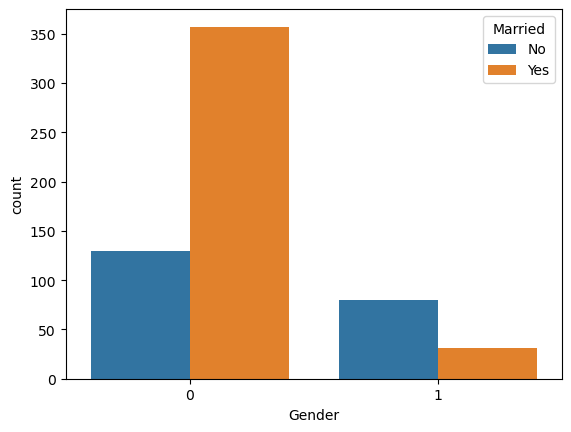

In [10]:
# Use the Seaborn library to create a countplot visualization of the distribution of a variable (Gender)

sns.countplot(data=data,x='Gender' ,hue='Married')
plt.show()

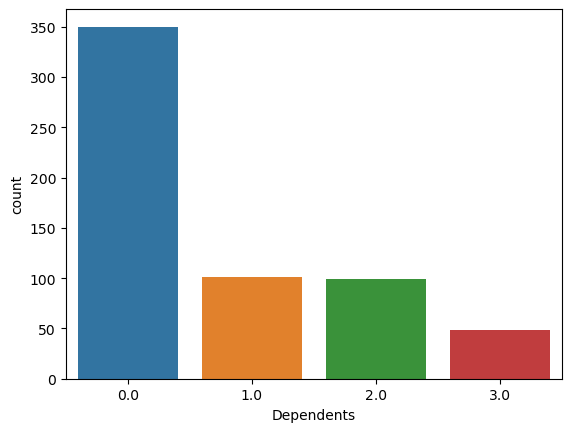

In [11]:
# Create a countplot visualization of the distribution of a variable (Dependents)

sns.countplot(data=data,x='Dependents')
plt.show()

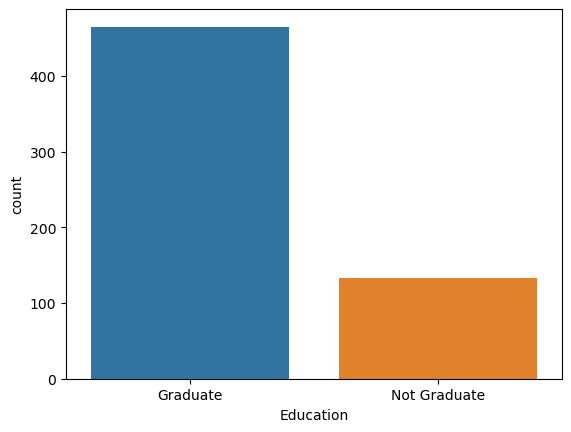

In [12]:
# Create a countplot visualization of the distribution of a variable (Education)

sns.countplot(data=data, x='Education')
plt.show()

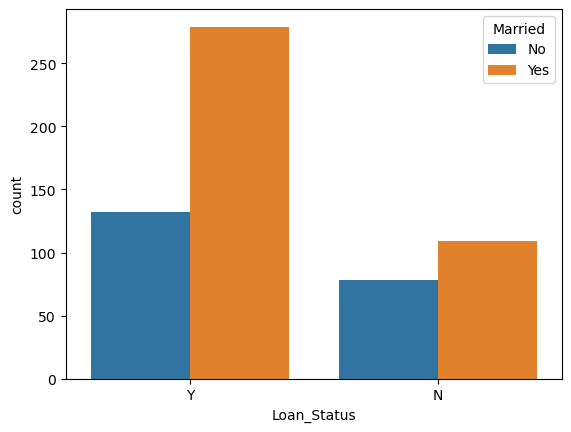

In [13]:
# Create a countplot visualization of the distribution of loan Approval status for each category of the variable (Married).

sns.countplot(data=data,x='Loan_Status',hue='Married')
plt.show()

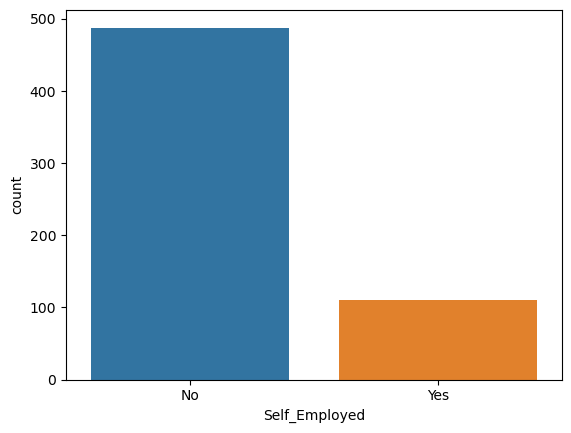

In [14]:
# Create a countplot visualization of the distribution of a variable (Self_Employed)

sns.countplot(data=data,x='Self_Employed')
plt.show()

In [15]:
#Reset the index of the DataFrame 'Data'.

data = data.reset_index()

In [16]:
#Add a new column to DataFrame 'Data' called 'Total_Income', which is calculated by summing the 'ApplicantIncome' and 'CoapplicantIncome' columns.

data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

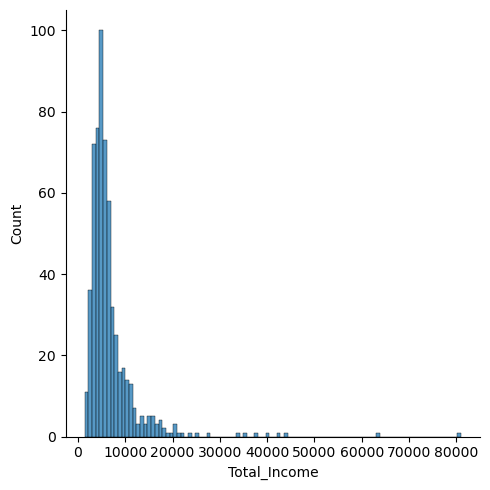

In [17]:
# Create a countplot visualization of the distribution of a variable (Total_Income)

sns.displot(data=data, x='Total_Income')
plt.show()

In [18]:
# Create a new DataFrame that is a copy of the original one 'Data'.
# In case the numeric values skewed - log the data 

model_data = data.copy()

In [19]:
# Reduce the impact of extreme values and make the data more normally distributed

model_data['Total_Income'] = np.log(model_data['Total_Income'])

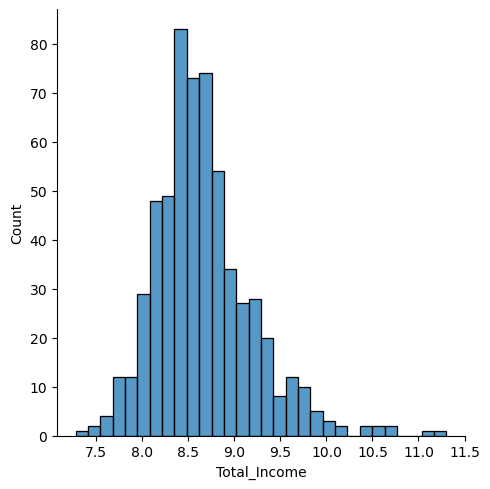

In [20]:
# Create a countplot visualization of the distribution of a variable (Total_Income) of model_data set

sns.displot(data=model_data, x='Total_Income')
plt.show()

In [21]:
# Retrieve the column labels for the 'model_data' DataFrame and variables included in the dataset.

model_data.columns

Index(['index', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

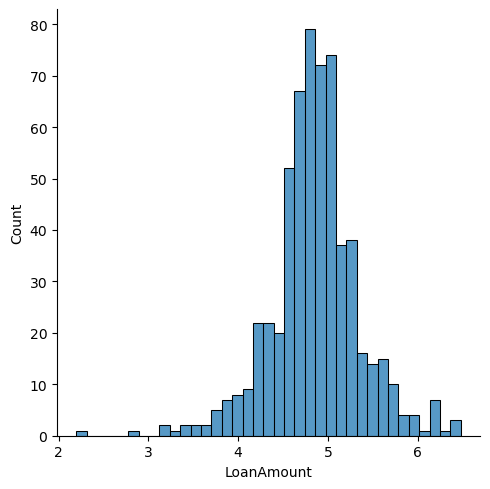

In [22]:
# Reduce the impact of extreme values and make the data more normally distributed
# Create a countplot visualization of the distribution of a variable (LoanAmount) of model_data set


model_data['LoanAmount'] = np.log(model_data['LoanAmount'])
sns.displot(data=model_data, x='LoanAmount')
plt.show()

In [23]:
#Identifying the different loan terms that are available in the 'model_data'

model_data['Loan_Amount_Term'].unique()

array([360.        , 120.        , 240.        , 341.91780822,
       180.        ,  60.        , 300.        , 480.        ,
        36.        ,  84.        ,  12.        ])

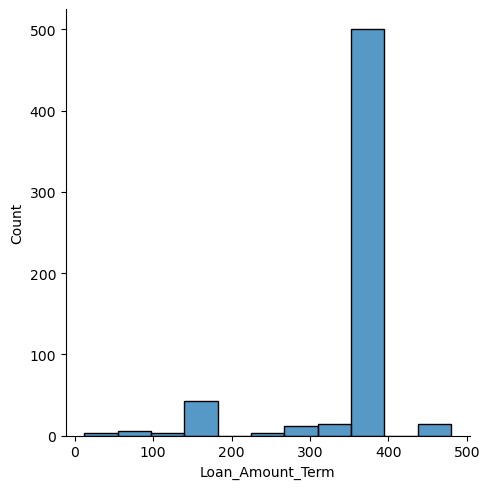

In [24]:
# Create a countplot visualization of the distribution of a variable (Loan_Amount_Term) of model_data set

sns.displot(data=model_data,x='Loan_Amount_Term')
plt.show()

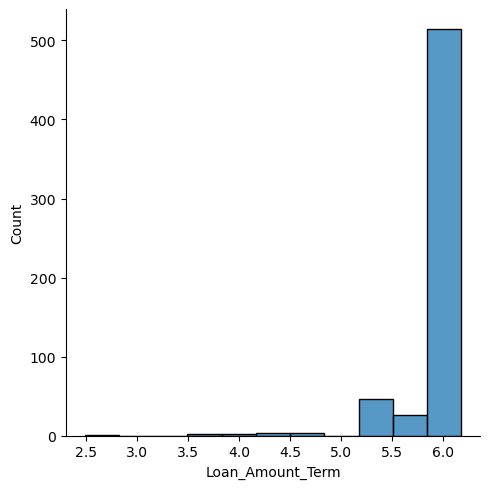

In [25]:
# Reduce the impact of extreme values and make the data more normally distributed
# Create a countplot visualization of the distribution of a variable (Loan_Amount_Term) of model_data set


model_data['Loan_Amount_Term'] = np.log(model_data['Loan_Amount_Term'])
sns.displot(data=model_data, x='Loan_Amount_Term')
plt.show()

In [26]:
# Retrieves all unique values in that variable 'Credit_History' column.
# Return an array containing [0, 1].

model_data['Credit_History'].unique()

array([1., 0.])

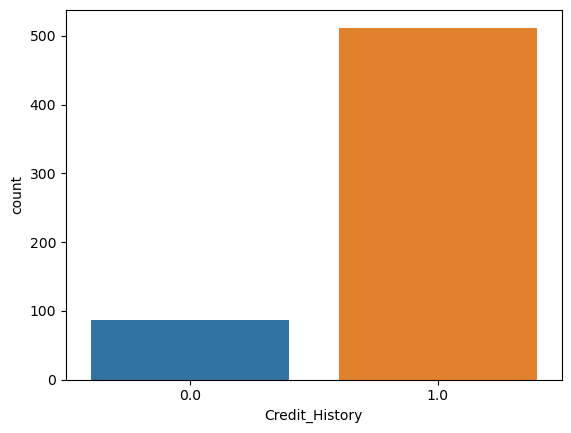

In [27]:
# Create a countplot visualization of the distribution of a variable (Credit_History) of model_data set

sns.countplot(data=model_data, x='Credit_History')
plt.show()

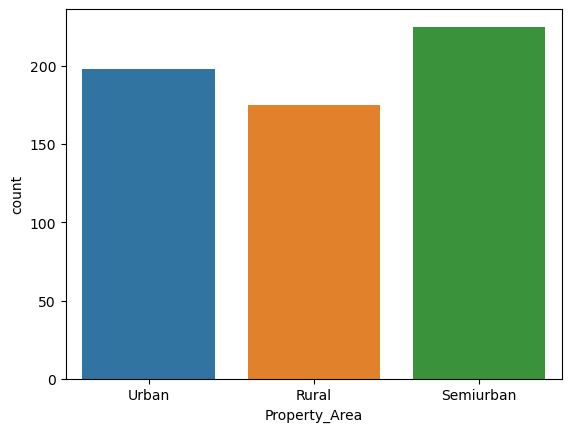

In [28]:
# Create a countplot visualization of the distribution of a variable (Property Area)

sns.countplot(data=data,x='Property_Area')
plt.show()

,index,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
index,1.000000,0.028765,0.060570,0.029095,0.042334,0.049699,-0.028221,-0.030394,0.047258
Gender,0.028765,1.000000,-0.172620,-0.057386,-0.083080,-0.105533,0.082361,-0.012708,-0.093012
Dependents,0.060570,-0.172620,1.000000,0.084744,0.036101,0.131406,-0.100589,-0.034664,0.096248
ApplicantIncome,0.029095,-0.057386,0.084744,1.000000,-0.109235,0.524682,-0.035334,-0.033683,0.881652
CoapplicantIncome,0.042334,-0.083080,0.036101,-0.109235,1.000000,0.206218,-0.060198,0.014622,0.372770
LoanAmount,0.049699,-0.105533,0.131406,0.524682,0.206218,1.000000,0.048591,-0.011951,0.587696
Loan_Amount_Term,-0.028221,0.082361,-0.100589,-0.035334,-0.060198,0.048591,1.000000,0.003954,-0.061564
Credit_History,-0.030394,-0.012708,-0.034664,-0.033683,0.014622,-0.011951,0.003954,1.000000,-0.024502
Total_Income,0.047258,-0.093012,0.096248,0.881652,0.372770,0.587696,-0.061564,-0.024502,1.000000


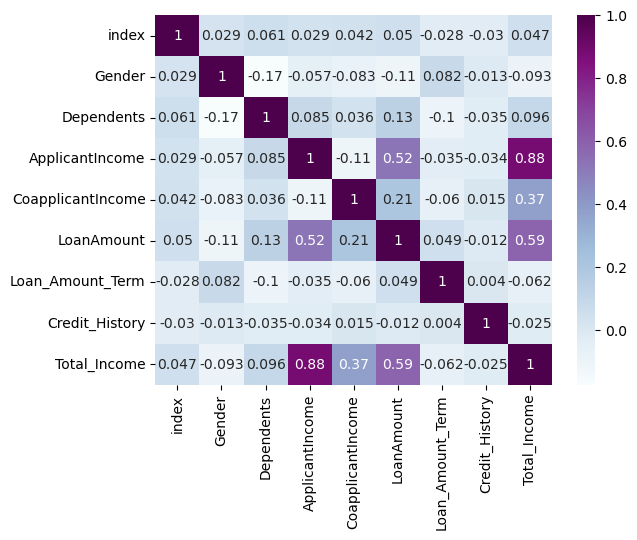

In [29]:
# Create a heatmap visualization of a correlation matrix.

sns.heatmap(data.corr(), cmap='BuPu', annot=True)
data.corr()

In [30]:
# Categorical variables in the DataFrame will have been replaced with integer codes

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

In [31]:
# Fill the missing values in a Pandas DataFrame named data with the mean value of each column.

for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

In [32]:
# Prepares the data for a supervised machine learning task by separating the input features and the target variable in a Pandas DataFrame named data.

x = data.drop(['Loan_Status'], axis=1)
y = data.Loan_Status

In [33]:
# Splits the data into a training set and a testing set and 30% of the data will be used for testing and 70% will be used for training.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)


print("Number of Original Data:", model_data.shape[0])
print("Number of Original Variable Data:", model_data.shape[1])
print("\n")

print("Training Data:", x_train.shape[0])
print("Variables of Training Data:", x_train.shape[1])

print("\n")
print("Testing Data:", x_test.shape[0])
print("Variables of Testing Data:", x_test.shape[1])



Number of Original Data: 598
Number of Original Variable Data: 14


Training Data: 418
Variables of Training Data: 13


Testing Data: 180
Variables of Testing Data: 13


In [34]:
#Trains and evaluates multiple machine learning models including Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. on a dataset using cross-validation.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from tabulate import tabulate


# Define the models
models = []
models.append(('Logistic Regression', LogisticRegression(max_iter=1000)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))


def modeling(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    prec = precision_score(y_test, y_pred, average='weighted') * 100
    rec = recall_score(y_test, y_pred, average='weighted') * 100
    return acc, f1, prec, rec
    
    
# Evaluate the machine learning models    
results = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    prec = precision_score(y_test, y_pred, average='weighted') * 100
    rec = recall_score(y_test, y_pred, average='weighted') * 100
    results.append([name, acc, f1, prec, rec])

    
# Print the results in a table
headers = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
table = tabulate(results, headers=headers, tablefmt='orgtbl')
print(table) 
    

| Model                    |   Accuracy |   F1 Score |   Precision |   Recall |
|--------------------------+------------+------------+-------------+----------|
| Logistic Regression      |    81.6667 |    79.3356 |     81.1677 |  81.6667 |
| Decision Tree Classifier |    71.6667 |    72.5733 |     73.9966 |  71.6667 |
| Random Forest Classifier |    80.5556 |    78.6687 |     79.2907 |  80.5556 |


In [35]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 19,  27],
       [  8, 126]], dtype=int64)

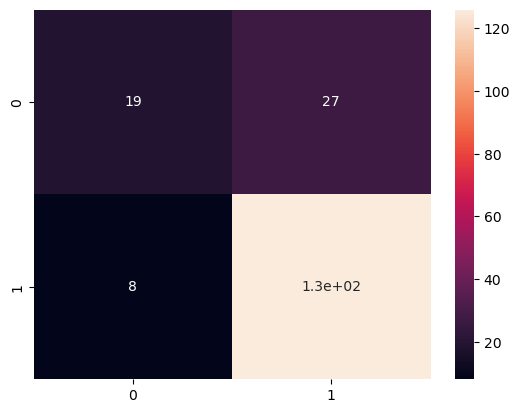

In [36]:
sns.heatmap(cm,annot=True)
plt.show()